In [1]:
import os
import numpy as np

from PIL import Image, ImageChops
import operator
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation 

## Train ML model

In [6]:
train_path = 'dataset'
l = []

print('Build dataset')
for subpath in os.listdir(train_path):
    for file in os.listdir(train_path+'/'+subpath):
        path = train_path+'/'+subpath+'/'+file
        im = Image.open(path)
        im_arr = (np.array(ImageChops.invert(Image.open(path)).resize((28,28)))/255).flatten()
        im_arr = np.append(im_arr, int(subpath))
        l.append(im_arr)

dataset = pd.DataFrame(l)
dataset = dataset.rename(columns={784:'label'})
dataset.to_csv('dataset.csv',index=False)

Build dataset



In [26]:
dataset = pd.read_csv('dataset.csv')
X = np.array(dataset.drop('label',axis=1))
y = np.array(dataset.label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('training set population',Counter(y_train))

training set population Counter({5.0: 826, 9.0: 820, 7.0: 818, 8.0: 816, 2.0: 816, 4.0: 815, 6.0: 813, 1.0: 810, 3.0: 799, 0.0: 795})


In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (8128, 28, 28, 1)
Testing matrix shape (2032, 28, 28, 1)


In [29]:
nb_classes = 10 # number of unique digits
batch_size = 64
epochs = 20

y_train = np_utils.to_categorical(y_train, nb_classes)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [31]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)       

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

In [35]:
train_generator = gen.flow(X_train, y_train, batch_size=64)

In [37]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=X_train.shape[0] // batch_size, 
    epochs = epochs, 
    verbose=1, 
    validation_data = (X_val,y_val), 
    validation_steps=X_val.shape[0] // batch_size
)

Epoch 1/20
114/114 [==============================] - 46s 401ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0278 - val_accuracy: 0.9852
Epoch 2/20
114/114 [==============================] - 45s 398ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 3/20
114/114 [==============================] - 42s 367ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/20
114/114 [==============================] - 37s 327ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/20
114/114 [==============================] - 39s 342ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 6/20
114/114 [==============================] - 39s 344ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/20
114/114 [==============================] - 40s 349ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0107 - val_ac

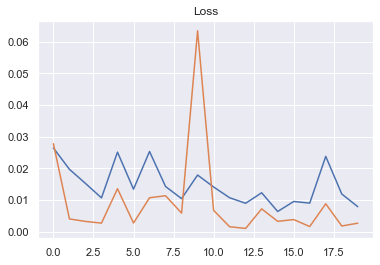

In [38]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

In [40]:
score = model.evaluate(X_val, y_val)
print('Val accuracy:', score[1])

26/26 [==============================] - 1s 39ms/step - loss: 0.0026 - accuracy: 0.9988
Val accuracy: 0.998769998550415


In [41]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1)

In [44]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       221
         1.0       1.00      1.00      1.00       206
         2.0       1.00      1.00      1.00       200
         3.0       1.00      1.00      1.00       217
         4.0       1.00      1.00      1.00       201
         5.0       1.00      0.99      1.00       190
         6.0       1.00      1.00      1.00       203
         7.0       1.00      0.99      1.00       198
         8.0       1.00      1.00      1.00       200
         9.0       1.00      1.00      1.00       196

    accuracy                           1.00      2032
   macro avg       1.00      1.00      1.00      2032
weighted avg       1.00      1.00      1.00      2032



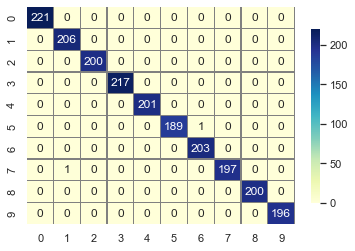

In [45]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_classes), 
    cmap='YlGnBu', 
    linewidths=.2,
    linecolor='gray',
    cbar_kws={"shrink": .8},
    annot = True,
    fmt='d'
)
plt.show()

In [46]:
model.save("CNN_digit_model.h5")

### Predict function

In [29]:
im = Image.open('dataset/4/img005-00001.png')
image = np.array(im.resize((28,28)))

In [30]:
imagem = (255-image)/255

In [31]:
imagem.shape

(28, 28)

In [32]:
imagem.max()

1.0

In [33]:
from keras.models import load_model
clf_trained = load_model("CNN_digit_model.h5")

X_image = imagem.reshape(1, 28, 28, 1)

In [36]:
y_image_pred = clf_trained.predict(X_image)
y_image_pred_classes = np.argmax(y_image_pred, axis=1)[0]

In [37]:
y_image_pred_classes

4